In [2]:
!pip3 install pychrome


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip


In [4]:
import subprocess
import pychrome
import time
import requests
import os

In [9]:
# Function to check if remote debugging is enabled
def is_remote_debugging_enabled():
    try:
        response = requests.get("http://127.0.0.1:9222/json")
        if response.status_code == 200:
            return True
    except requests.exceptions.ConnectionError:
        return False
    return False

# Function to launch Brave with remote debugging
def launch_brave_with_debugging():
    # Determine the path to the Brave executable
    brave_path = "/Applications/Brave Browser.app/Contents/MacOS/Brave Browser"  # Adjust this path for your OS
    if not os.path.exists(brave_path):
        print('fail')
        brave_path = "/usr/bin/brave"  # Alternative path for Brave

    # Start Brave with remote debugging enabled
    subprocess.Popen([brave_path, "--remote-debugging-port=9222", "--no-first-run", "--no-default-browser-check"])

# Launch Brave with remote debugging
launch_brave_with_debugging()

Opening in existing browser session.


In [30]:
import sqlite3
import os
from datetime import datetime, timedelta
import pandas as pd

# Path to the Brave browsing history file (adjust path as necessary)
history_path = "/Users/adambrownell/Library/Application Support/BraveSoftware/Brave-Browser/Default/History"
history_path_tmp = os.getcwd()+"/brave_history_copy.db"

subprocess.run(["cp", history_path, history_path_tmp], check=True)


# Connect to the SQLite database that stores the browsing history
conn = sqlite3.connect(history_path_tmp)
cursor = conn.cursor()

# Query to join urls and visits tables and order by visit_time
cursor.execute("""
    SELECT urls.url, urls.title, visits.visit_time
    FROM urls, visits
    WHERE urls.id = visits.url
    ORDER BY visits.visit_time ASC
""")

# Fetch all rows from the query
rows = cursor.fetchall()

# Convert visit_time from Chrome's timestamp format and store the data
visit_data = []
for row in rows:
    url = row[0]
    title = row[1]
    visit_time = datetime(1601, 1, 1) + timedelta(microseconds=row[2])
    visit_data.append((url, title, visit_time))

# Calculate the visit time difference between consecutive visits
visit_times = []
for i in range(len(visit_data) - 1):
    url, title, visit_time = visit_data[i]
    next_visit_time = visit_data[i + 1][2]
    time_spent = next_visit_time - visit_time
    visit_times.append((url, title, visit_time, time_spent))

# Close the database connection
conn.close()

# Create a DataFrame from the visit_times data
df = pd.DataFrame(visit_times, columns=["URL", "Title", "Visit Time", "Time Spent"])

# Display the DataFrame
print(df.head())  # Display the first few rows of the DataFrame

                                               URL  \
0                   https://app.simplifimoney.com/   
1                   https://app.simplifimoney.com/   
2            https://app.simplifimoney.com/reports   
3  https://calendar.google.com/calendar/u/0/r/week   
4  https://calendar.google.com/calendar/u/0/r/week   

                                               Title  \
0  Simplifi - The simple way to stay on top of yo...   
1  Simplifi - The simple way to stay on top of yo...   
2                       Simplifi - Reports: Spending   
3          Google Calendar - Week of August 26, 2024   
4          Google Calendar - Week of August 26, 2024   

                  Visit Time             Time Spent  
0 2024-05-29 09:46:49.353959 0 days 00:00:01.584511  
1 2024-05-29 09:46:50.938470 0 days 00:00:14.198538  
2 2024-05-29 09:47:05.137008 0 days 00:00:11.136722  
3 2024-05-29 09:47:16.273730 0 days 00:00:01.146772  
4 2024-05-29 09:47:17.420502 0 days 00:00:00.870924  


In [53]:
df['Website'] = df['URL'].str.extract(r'http[s]?://(?:www\.)?([^/.]+\.[^/.]+)')
df.loc[df['URL'].str.contains('localhost'), 'Website'] = 'Local Development'
df.loc[df['URL'].str.contains('/Jupyter/'), 'Website'] = 'Local Development'

df['Visit Date'] = df['Visit Time'].dt.date

df

,URL,Title,Visit Time,Time Spent,Website,Visit Date
0,https://app.simplifimoney.com/,Simplifi - The simple way to stay on top of yo...,2024-05-29 09:46:49.353959,0 days 00:00:01.584511,app.simplifimoney,2024-05-29
1,https://app.simplifimoney.com/,Simplifi - The simple way to stay on top of yo...,2024-05-29 09:46:50.938470,0 days 00:00:14.198538,app.simplifimoney,2024-05-29
2,https://app.simplifimoney.com/reports,Simplifi - Reports: Spending,2024-05-29 09:47:05.137008,0 days 00:00:11.136722,app.simplifimoney,2024-05-29
3,https://calendar.google.com/calendar/u/0/r/week,"Google Calendar - Week of August 26, 2024",2024-05-29 09:47:16.273730,0 days 00:00:01.146772,calendar.google,2024-05-29
4,https://calendar.google.com/calendar/u/0/r/week,"Google Calendar - Week of August 26, 2024",2024-05-29 09:47:17.420502,0 days 00:00:00.870924,calendar.google,2024-05-29
...,...,...,...,...,...,...
18005,file:///Users/adambrownell/Library/Jupyter/run...,Home,2024-08-27 04:49:52.368007,0 days 00:00:01.060537,Local Development,2024-08-27
18006,http://localhost:8888/tree?token=d806860ce2744...,Home,2024-08-27 04:49:53.428544,0 days 00:00:00.141389,Local Development,2024-08-27
18007,http://localhost:8888/tree,Home,2024-08-27 04:49:53.569933,0 days 00:00:06.608480,Local Development,2024-08-27
18008,http://localhost:8888/notebooks/Untitled.ipynb,Untitled,2024-08-27 04:50:00.178413,0 days 00:17:38.528017,Local Development,2024-08-27


In [58]:
four_hours = df.loc[df['Time Spent'] > timedelta(hours=4)]
avg_time = df.loc[df['Time Spent'] < timedelta(hours=4)]['Time Spent'].mean()
# Step 2: Calculate the average 'Time Spent' for each website, excluding visits over 5 hours
def calculate_average_time_spent(website):
    # Filter out visits to the specific website that are <= 5 hours
    relevant_times = df[(df['Website'] == website) & (df['Time Spent'] <= timedelta(hours=5))]['Time Spent']
    
    # Calculate the average time spent
    if not relevant_times.empty:
        return relevant_times.mean()
    else:
        print(f"Only 1 visit to {website}")
        return(avg_time)

for idx, row in four_hours.iterrows():
    website = row['Website']
    average_time_spent = calculate_average_time_spent(website)
    df.at[idx, 'Time Spent'] = average_time_spent

In [61]:
grouped_df = df.groupby(['Visit Date', 'Website'])['Time Spent'].sum().reset_index()
print(grouped_df)

      Visit Date                 Website                Time Spent
0     2024-05-29       app.simplifimoney    0 days 00:00:26.919771
1     2024-05-29              apps.apple    0 days 00:59:42.710902
2     2024-05-29         calendar.google    0 days 00:02:26.104395
3     2024-05-29       inspiredflow.yoga    0 days 00:03:05.500972
4     2024-05-29              reddit.com 0 days 00:15:31.758055301
...          ...                     ...                       ...
1218  2024-08-27  sso-auth.startupschool           0 days 00:00:00
1219  2024-08-27       startupschool.org    0 days 00:01:35.285226
1220  2024-08-27            vanguard.com           0 days 00:00:00
1221  2024-08-27         ycombinator.com    0 days 00:00:04.159731
1222  2024-08-27             youtube.com    0 days 01:41:16.651207

[1223 rows x 3 columns]


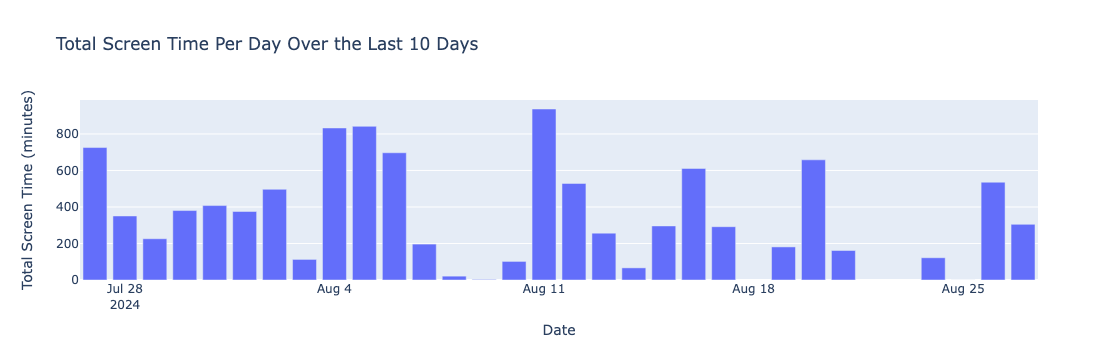

In [64]:
import plotly.express as px

# Calculate total screen time per day over the last 10 days
month_ago = datetime.now().date() - timedelta(days=30)
recent_df = df[df['Visit Date'] >= month_ago]

# Group by date and sum the Time Spent
total_time_per_day = recent_df.groupby('Visit Date')['Time Spent'].sum().reset_index()

# Convert Time Spent to minutes for easier plotting
total_time_per_day['Time Spent (minutes)'] = total_time_per_day['Time Spent'].dt.total_seconds() / 60

# Plot using Plotly
fig = px.bar(
    total_time_per_day,
    x='Visit Date',
    y='Time Spent (minutes)',
    title='Total Screen Time Per Day Over the Last Month',
    labels={'Time Spent (minutes)': 'Total Screen Time (minutes)', 'Visit Date': 'Date'}
)

fig.show()